# **Import Libraries**

In [1]:
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn import preprocessing
import json
import ast

# **Read CSV**

In [2]:
df = pd.read_csv('./annonimized.csv')
df1 = pd.read_csv('./qt-public.csv')
df2 = pd.read_csv('./th-public.csv')
df3 = pd.read_csv('./ck-public.csv')
df4 = pd.read_excel("./tbtl-public.ods", engine="odf")

# **Preprocessing**

In [3]:
df.rename(columns={"concat('it001',`assignment_id`)": "assignment_id",
                   "concat('it001',`problem_id`)": "problem_id",
                  "concat('it001', username)": "username",
                  "concat('it001',`language_id`)": "language_id",},
          inplace=True, errors='raise')

In [4]:
df1.rename(columns={"hash": "username",
                   "diemqt": "QT",},
          inplace=True, errors='raise')

In [5]:
df2.rename(columns={"hash": "username",},
          inplace=True, errors='raise')

In [6]:
df3.rename(columns={"hash": "username",},
          inplace=True, errors='raise')

In [7]:
# Fill các ô không có giá trị bằng điểm 0
df1['QT'] = df1['QT'].fillna(0)
df2['TH'] = df2['TH'].fillna(0)
df3['CK'] = df3['CK'].fillna(0)
df4['TBTL'] = df4['TBTL'].fillna(0)

In [8]:
df['coefficient'] = df['coefficient'] / 100

In [9]:
df['scores'] = df['pre_score'] * df['coefficient']

In [10]:
average_runtimes = []
max_runtimes = []
min_runtimes = []
sum_runtimes = []
average_memories = []
max_memories = []
min_memories = []
sum_memories = []
for i in df['judgement']:
    try:
        tmp = ast.literal_eval(i)
        if len(tmp["times"]) > 0:
            sum_runtimes.append(np.sum(tmp['times']))
            max_runtimes.append(np.max(tmp['times']))
            min_runtimes.append(np.min(tmp['times']))
            average_runtimes.append(np.average(tmp['times']))
        else:
            sum_runtimes.append(np.inf)
            max_runtimes.append(np.inf)
            min_runtimes.append(np.inf)
            average_runtimes.append(np.inf)
        if len(tmp["mems"]) > 0:
            sum_memories.append(np.sum(tmp["mems"]))
            max_memories.append(np.max(tmp["mems"]))
            min_memories.append(np.min(tmp["mems"]))
            average_memories.append(np.average(tmp["mems"]))
        else:
            sum_memories.append(np.inf)
            max_memories.append(np.inf)
            min_memories.append(np.inf)
            average_memories.append(np.inf)
    except:
        sum_runtimes.append(np.inf)
        max_runtimes.append(np.inf)
        min_runtimes.append(np.inf)
        average_runtimes.append(np.inf)
        sum_memories.append(np.inf)
        max_memories.append(np.inf)
        min_memories.append(np.inf)
        average_memories.append(np.inf)
df['sum_runtimes'] = sum_runtimes
df['max_runtimes'] = max_runtimes
df['min_runtimes'] = min_runtimes
df['average_runtimes'] = average_runtimes
df['average_memories'] = average_memories
df['max_memories'] = max_memories
df['min_memories'] = min_memories
df['sum_memories'] = sum_memories
# Chuyển đổi cột `created_at` và `updated_at` thành số giây kể từ mốc thời gian cố định
df['created_at'] = '2024-' + df['created_at']
df['updated_at'] = '2024-' + df['updated_at']
df['created_at'] = pd.to_datetime(df['created_at'], format='%Y-%m-%d %H:%M:%S').apply(lambda x: x.timestamp())
df['updated_at'] = pd.to_datetime(df['updated_at'], format='%Y-%m-%d %H:%M:%S').apply(lambda x: x.timestamp())
df['waiting_time'] = df['updated_at'] - df['created_at']

In [11]:
df.drop(['pre_score', 'coefficient', 'judgement', 'created_at', 'updated_at'], axis = 1, inplace = True) 

In [12]:
df

,assignment_id,problem_id,username,is_final,status,language_id,scores,sum_runtimes,max_runtimes,min_runtimes,average_runtimes,average_memories,max_memories,min_memories,sum_memories,waiting_time
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,it0012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,294.0
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,it0012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,it0012,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,it0012,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,it0012,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295193,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,388516cbf597351226be1bdbe5ef30b9dcef570f,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,it0012,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
295194,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,0,Compilation Error,it0012,0.0,inf,inf,inf,inf,inf,inf,inf,inf,61.0
295195,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,it0012,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
295196,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,8c0f8dd4ff55e1609f733e043ac5e88b1dde6e7c,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,it0012,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0


# **Feature Engineering**

In [13]:
X_train = []
y1_train = []
y2_train = []
y3_train = []
y4_train = []
X_test = []
user_test = []
for username in np.unique(df['username']):
    # Feature Engineering
    feature = []
    user_infors = df[df['username'] == username]
    # Số lượng submit
    feature.append(user_infors.shape[0])
    # Số lượng compilation error
    feature.append(user_infors[user_infors['status'] == 'Compilation Error'].shape[0])
    # Số lượng syntax error
    feature.append(user_infors[user_infors['status'] == 'Syntax Error'].shape[0])
    # Số lượng ngôn ngữ sử dụng và nộp bài chạy thành công không bị lỗi compilation cũng như syntax
    feature.append(np.unique(user_infors[user_infors['status'] == 'SCORE']['language_id']).shape[0])
    # Số lượng problem đã làm và nộp bài chạy thành công không bị lỗi compilation cũng như syntax
    feature.append(np.unique(user_infors[user_infors['status'] == 'SCORE']['problem_id']).shape[0])
    # Số lượng assignment đã làm và nộp bài chạy thành công không bị lỗi compilation cũng như syntax
    feature.append(np.unique(user_infors[user_infors['status'] == 'SCORE']['assignment_id']).shape[0])
    # Thời gian chạy trung bình của các testcase có final = 1 và chạy thành công
    tmp_user_infors = user_infors[user_infors['is_final'] == 1]
    if tmp_user_infors[tmp_user_infors['status'] == 'SCORE']['sum_runtimes'].shape[0] > 0:
        feature.append(np.average(tmp_user_infors[tmp_user_infors['status'] == 'SCORE']['sum_runtimes']))
    else:
        feature.append(np.inf)
    # Thời gian chạy lớn nhất của các testcase có final = 1 và chạy thành công
    if tmp_user_infors[tmp_user_infors['status'] == 'SCORE']['max_runtimes'].shape[0] > 0:
        feature.append(np.max(tmp_user_infors[tmp_user_infors['status'] == 'SCORE']['max_runtimes']))
    else:
        feature.append(np.inf)
    # Thời gian chạy nhỏ nhất của các testcase có final = 1 và chạy thành công
    if tmp_user_infors[tmp_user_infors['status'] == 'SCORE']['min_runtimes'].shape[0] > 0:
        feature.append(np.min(tmp_user_infors[tmp_user_infors['status'] == 'SCORE']['min_runtimes']))
    else:
        feature.append(np.inf)
    # Bộ nhớ trung bình của các testcase có final = 1 và chạy thành công
    if tmp_user_infors[tmp_user_infors['status'] == 'SCORE']['sum_memories'].shape[0] > 0:
        feature.append(np.average(tmp_user_infors[tmp_user_infors['status'] == 'SCORE']['sum_memories']))
    else:
        feature.append(np.inf)
    # Bộ nhớ lớn nhất của các testcase có final = 1 và chạy thành công
    if tmp_user_infors[tmp_user_infors['status'] == 'SCORE']['max_memories'].shape[0] > 0:
        feature.append(np.max(tmp_user_infors[tmp_user_infors['status'] == 'SCORE']['max_memories']))
    else:
        feature.append(np.inf)
    # Bộ nhớ nhỏ nhất của các testcase có final = 1 và chạy thành công
    if tmp_user_infors[tmp_user_infors['status'] == 'SCORE']['min_memories'].shape[0] > 0:
        feature.append(np.min(tmp_user_infors[tmp_user_infors['status'] == 'SCORE']['min_memories']))
    else:
        feature.append(np.inf)
    # Thời gian đợi trung bình của submit trên server cho đến khi được chấm
    if tmp_user_infors[tmp_user_infors['status'] == 'SCORE']['waiting_time'].shape[0] > 0:
        feature.append(np.average(tmp_user_infors[tmp_user_infors['status'] == 'SCORE']['waiting_time']))
    else:
        feature.append(np.inf)
    # Điểm trung bình của các lần submit cao nhất của mỗi problem
    scores = 0
    tmp_user_infors = tmp_user_infors[tmp_user_infors['status'] == 'SCORE']
    for i in np.unique(tmp_user_infors['problem_id']):
        scores += np.max(tmp_user_infors[tmp_user_infors['problem_id'] == i]['scores'])
    try:
        feature.append(scores/np.unique(np.unique(tmp_user_infors['problem_id'])).shape[0])
    except:
        feature.append(0)
    
    
    if username in np.array(df1['username']):
        X_train.append(feature)
        try:
            y1_train.append(np.float32(np.array(df1[df1['username'] == username]['QT'])[0]))
        except:
            y1_train.append(0)
        try:
            y2_train.append(np.float32(np.array(df2[df2['username'] == username]['TH'])[0]))
        except:
            y2_train.append(0)
        try:
            y3_train.append(np.float32(np.array(df3[df3['username'] == username]['CK'])[0]))
        except:
            y3_train.append(0)
        try:
            y4_train.append(np.float32(np.array(df4[df4['username'] == username]['TBTL'])[0]))
        except:
            y4_train.append(0)
    elif username not in np.array(df4['username']):
        X_test.append(feature)
        user_test.append(username)

X_train = np.array(X_train)
y1_train = np.array(y1_train)
y2_train = np.array(y2_train)
y3_train = np.array(y3_train)
y4_train = np.array(y4_train)
X_test = np.array(X_test)
user_test = np.array(user_test)

# **Save Data**

In [14]:
header = ['Submissions', 'Compilation Errors', 'Syntax Errors', 'Number of Languages', 'Done Problems', 'Done Assignments', 'Average Runtimes', 'Max Runtimes', 'Min Runtimes', 'Average Memories', 'Max Memories', 'Min Memories', 'Average Waiting Times', 'Average Scores']

df = pd.DataFrame(X_train, columns=header)
df['QT'] = y1_train
df['TH'] = y2_train
df['CK'] = y3_train
df['TBTL'] = y4_train

In [15]:
df

,Submissions,Compilation Errors,Syntax Errors,Number of Languages,Done Problems,Done Assignments,Average Runtimes,Max Runtimes,Min Runtimes,Average Memories,Max Memories,Min Memories,Average Waiting Times,Average Scores,QT,TH,CK,TBTL
0,147.0,28.0,0.0,1.0,46.0,7.0,0.167174,0.48,0.0,2115.652174,5020.0,0.0,10.326087,10000.000000,7.5,5.0,5.5,7.24
1,259.0,50.0,0.0,1.0,77.0,9.0,0.128961,0.69,0.0,1404.935065,5876.0,0.0,948.714286,9772.714286,7.0,8.5,6.5,8.11
2,195.0,20.0,0.0,1.0,65.0,7.0,0.073788,0.55,0.0,834.484848,6432.0,0.0,11.984848,9585.937500,9.0,7.0,4.5,7.30
3,107.0,13.0,0.0,1.0,52.0,8.0,0.460455,1.06,0.0,3637.333333,1984.0,0.0,13.409091,8894.596154,10.0,10.0,5.0,8.20
4,199.0,45.0,0.0,1.0,84.0,9.0,0.000000,0.00,0.0,0.000000,0.0,0.0,2345.976190,9476.190476,9.0,6.0,4.0,7.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,111.0,30.0,0.0,1.0,43.0,6.0,0.013409,0.51,0.0,224.727273,5336.0,0.0,9.045455,9380.952381,9.0,6.0,5.5,7.67
757,357.0,103.0,0.0,1.0,104.0,17.0,0.145000,0.95,0.0,448.307692,6268.0,0.0,9.230769,9921.596154,8.0,8.5,6.0,7.54
758,155.0,38.0,0.0,1.0,49.0,8.0,0.057200,0.52,0.0,555.520000,1984.0,0.0,8.540000,9673.469388,6.5,5.5,6.0,7.49
759,557.0,141.0,0.0,1.0,112.0,12.0,0.116339,0.54,0.0,1711.392857,5892.0,0.0,666.026786,9875.000000,10.0,10.0,7.0,8.94


In [16]:
df.to_csv('./Data.csv', index=False)

In [17]:
df1 = pd.DataFrame(X_test, columns=header)
df1['username'] = user_test
df1.to_csv('./Test.csv', index=False)

# **Visualize**

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('./Data.csv')

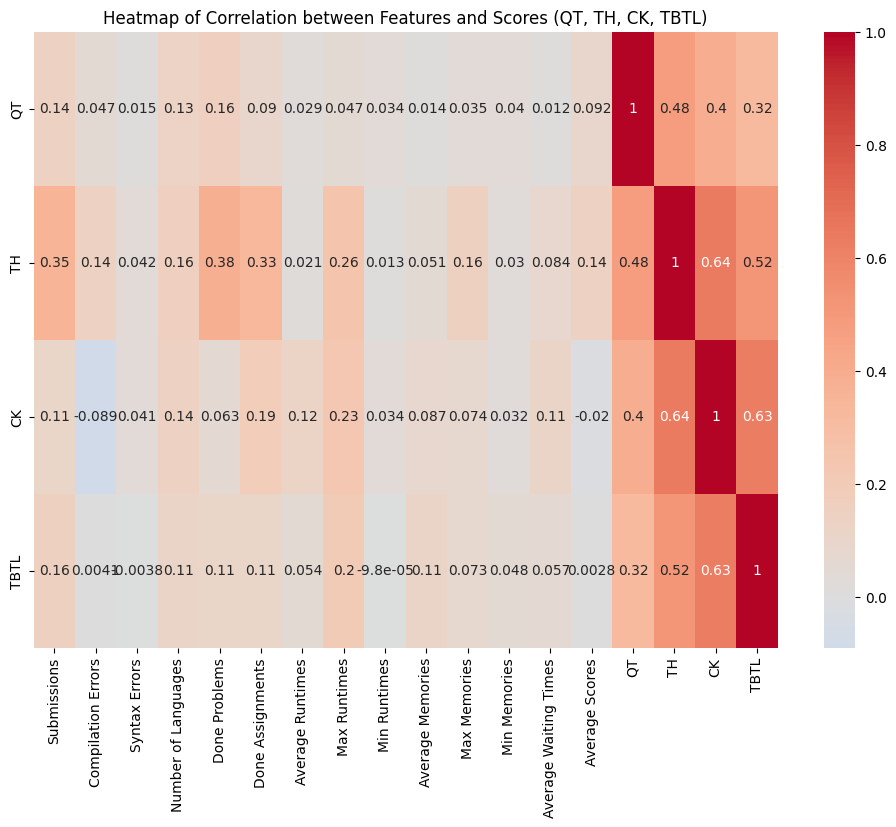

In [20]:
# Tính toán ma trận hệ số tương quan Pearson
correlation_matrix = df.corr()

# Lấy hệ số tương quan giữa các features và các điểm QT, TH, CK, TBTL
corr_with_scores = correlation_matrix.loc[['QT', 'TH', 'CK', 'TBTL'], :]

# Vẽ heatmap để hiển thị ma trận tương quan
plt.figure(figsize=(12, 8))
sns.heatmap(corr_with_scores, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Correlation between Features and Scores (QT, TH, CK, TBTL)')
plt.show()

# **Scale Data**

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
df = pd.read_csv('./Data.csv')

In [79]:
print(df.isin([np.inf, -np.inf]).sum())

Submissions              0
Compilation Errors       0
Syntax Errors            0
Number of Languages      0
Done Problems            0
Done Assignments         0
Average Runtimes         7
Max Runtimes             7
Min Runtimes             7
Average Memories         7
Max Memories             7
Min Memories             7
Average Waiting Times    7
Average Scores           0
QT                       0
TH                       0
CK                       0
TBTL                     0
dtype: int64


In [80]:
epsilon = 1e+2  # hoặc giá trị khác bạn muốn
# Thay thế các giá trị inf và -inf
for col in df.columns:
    if df[col].dtype in [np.float64, np.float32, np.int64, np.int32]:
        max_value = df.loc[df[col] != np.inf, col].max()
        min_value = df.loc[df[col] != -np.inf, col].min()
        
        df[col].replace(np.inf, max_value + epsilon, inplace=True)
        df[col].replace(-np.inf, min_value - epsilon, inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_26804\4288556398.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(np.inf, max_value + epsilon, inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_26804\4288556398.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [81]:
print(df.isin([np.inf, -np.inf]).sum())

Submissions              0
Compilation Errors       0
Syntax Errors            0
Number of Languages      0
Done Problems            0
Done Assignments         0
Average Runtimes         0
Max Runtimes             0
Min Runtimes             0
Average Memories         0
Max Memories             0
Min Memories             0
Average Waiting Times    0
Average Scores           0
QT                       0
TH                       0
CK                       0
TBTL                     0
dtype: int64


In [82]:
features = df[['Submissions', 'Compilation Errors', 'Number of Languages', 'Done Problems', 'Done Assignments', 'Max Runtimes', 'Max Memories', 'Average Scores']].values
# features = df[['Submissions', 'Number of Languages', 'Done Problems', 'Done Assignments']].values
# features = df.drop(['QT', 'TH', 'CK', 'TBTL'], axis = 1).values
labels_th = df['TH'].values
labels_qt = df['QT'].values
labels_ck = df['CK'].values
labels_tbtl = df['TBTL'].values

In [83]:
# Hàm thêm nhiễu Gaussian
def add_gaussian_noise(data, noise_level=0.1):
    noise = np.random.normal(np.mean(data), np.std(data), data.shape)
    return data + noise

In [84]:
# Tạo dữ liệu tăng cường bằng cách thêm nhiễu Gaussian
features_augmented = add_gaussian_noise(features, noise_level=0.1)
labels_th_augmented = add_gaussian_noise(labels_th, noise_level=0.1)
labels_qt_augmented = add_gaussian_noise(labels_qt, noise_level=0.1)
labels_ck_augmented = add_gaussian_noise(labels_ck, noise_level=0.1)
labels_tbtl_augmented = add_gaussian_noise(labels_tbtl, noise_level=0.1)

# Kết hợp dữ liệu ban đầu và dữ liệu tăng cường
features = np.vstack((features, features_augmented))
labels_th = np.hstack((labels_th, labels_th_augmented))
labels_qt = np.hstack((labels_qt, labels_qt_augmented))
labels_ck = np.hstack((labels_ck, labels_ck_augmented))
labels_tbtl = np.hstack((labels_tbtl, labels_tbtl_augmented))

In [85]:
features.shape

(1522, 8)

In [86]:
scaler = StandardScaler()
scaler.fit(features)

StandardScaler()

In [87]:
scaled_features = scaler.transform(features)
scaled_features = features

# **Training**

In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Concatenate, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

## **Train Test Split**

In [89]:
X_train, X_test, y_th_train, y_th_test, y_qt_train, y_qt_test, y_ck_train, y_ck_test, y_tbtl_train, y_tbtl_test = train_test_split(
    scaled_features, labels_th, labels_qt, labels_ck, labels_tbtl, test_size=0.2, random_state=2024)

## **Random Forest TH**

In [90]:
rf_model_TH = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model_TH.fit(X_train, y_th_train)

RandomForestRegressor(n_estimators=200, random_state=42)

### **Evaluation**

In [91]:
predictions = rf_model_TH.predict(X_test)
r2_th = r2_score(y_th_test, predictions)
print(f"R2 for TH: {r2_th}")

R2 for TH: 0.6320531347731955


## **Random Forest QT**

In [92]:
train_predictions = rf_model_TH.predict(X_train)
X_train_QT = []
for i in range(train_predictions.shape[0]):
    tmp = list(X_train[i])
    tmp.append(train_predictions[i])
    X_train_QT.append(tmp)
rf_model_QT = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model_QT.fit(X_train_QT, y_qt_train)

RandomForestRegressor(n_estimators=200, random_state=42)

### **Evaluation**

In [93]:
X_test_QT = []
for i in range(predictions.shape[0]):
    tmp = list(X_test[i])
    tmp.append(predictions[i])
    X_test_QT.append(tmp)
predictions = rf_model_QT.predict(X_test_QT)
r2_qt = r2_score(y_qt_test, predictions)
print(f"R2 for QT: {r2_qt}")

R2 for QT: 0.8002104000036389


## **Random Forest CK**

In [94]:
train_predictions = rf_model_QT.predict(X_train_QT)
X_train_CK = []
for i in range(train_predictions.shape[0]):
    tmp = list(X_train_QT[i])
    tmp.append(train_predictions[i])
    X_train_CK.append(tmp)
rf_model_CK = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model_CK.fit(X_train_CK, y_ck_train)

RandomForestRegressor(n_estimators=200, random_state=42)

### **Evaluation**

In [95]:
X_test_CK = []
for i in range(predictions.shape[0]):
    tmp = list(X_test_QT[i])
    tmp.append(predictions[i])
    X_test_CK.append(tmp)
predictions = rf_model_CK.predict(X_test_CK)
r2_ck = r2_score(y_ck_test, predictions)
print(f"R2 for CK: {r2_ck}")

R2 for CK: 0.5635332138167342


## **Random Forest TBTL**

In [96]:
train_predictions = rf_model_CK.predict(X_train_CK)
X_train_TBTL = []
for i in range(train_predictions.shape[0]):
    tmp = list(X_train_CK[i])
    tmp.append(train_predictions[i])
    X_train_TBTL.append(tmp)
rf_model_TBTL = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model_TBTL.fit(X_train_TBTL, y_tbtl_train)

RandomForestRegressor(n_estimators=200, random_state=42)

### **Evaluation**

In [97]:
X_test_TBTL = []
for i in range(predictions.shape[0]):
    tmp = list(X_test_CK[i])
    tmp.append(predictions[i])
    X_test_TBTL.append(tmp)
predictions = rf_model_TBTL.predict(X_test_TBTL)
r2_tbtl = r2_score(y_tbtl_test, predictions)
print(f"R2 for TBTL: {r2_tbtl}")

R2 for TBTL: 0.9356761351647029


## **Deep Neural Network**

In [98]:
# Định nghĩa các đầu vào và các tầng của mô hình
input_layer = Input(shape=(features.shape[1],))

# Dự đoán TH
th_dense = Dense(64, activation='tanh')(input_layer)
th_dense = Dropout(0.25)(th_dense)
th_dense = Dense(32, activation='tanh')(th_dense)
th_dense = Dropout(0.25)(th_dense)
th_dense = Dense(16, activation='relu')(th_dense)
th_dense = Dropout(0.25)(th_dense)
th_output = Dense(1, name='th_output')(th_dense)

# Dự đoán QT sử dụng TH và features
qt_input = Concatenate()([input_layer, th_output])
qt_dense = Dense(64, activation='tanh')(qt_input)
qt_dense = Dropout(0.25)(qt_dense)
qt_dense = Dense(32, activation='tanh')(qt_dense)
qt_dense = Dropout(0.25)(qt_dense)
qt_dense = Dense(16, activation='relu')(qt_dense)
qt_dense = Dropout(0.25)(qt_dense)
qt_output = Dense(1, name='qt_output')(qt_dense)

# Dự đoán CK sử dụng QT và features
ck_input = Concatenate()([input_layer, qt_output])
ck_dense = Dense(64, activation='tanh')(ck_input)
ck_dense = Dropout(0.25)(ck_dense)
ck_dense = Dense(32, activation='tanh')(ck_dense)
ck_dense = Dropout(0.25)(ck_dense)
ck_dense = Dense(16, activation='relu')(ck_dense)
ck_dense = Dropout(0.25)(ck_dense)
ck_output = Dense(1, name='ck_output')(ck_dense)

# Dự đoán TBTL sử dụng CK, QT, TH và features
tbtl_input = Concatenate()([input_layer, th_output, qt_output, ck_output])
tbtl_dense = Dense(64, activation='tanh')(tbtl_input)
tbtl_dense = Dropout(0.25)(tbtl_dense)
tbtl_dense = Dense(32, activation='tanh')(tbtl_dense)
tbtl_dense = Dropout(0.25)(tbtl_dense)
tbtl_dense = Dense(16, activation='relu')(tbtl_dense)
tbtl_dense = Dropout(0.25)(tbtl_dense)
tbtl_output = Dense(1, name='tbtl_output')(tbtl_dense)

# Định nghĩa mô hình với 4 đầu ra
model = Model(inputs=input_layer, outputs=[th_output, qt_output, ck_output, tbtl_output])

In [99]:
class CustomVerboseCallback(tf.keras.callbacks.Callback):
    def __init__(self, verbose_interval):
        super().__init__()
        self.verbose_interval = verbose_interval

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.verbose_interval == 0:
            print(f"Epoch {epoch + 1}: loss = {logs['loss']}, val_loss = {logs['val_loss']}")

In [100]:
lr = 5e-3
optimizer = Adam(learning_rate=lr)
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mae', 'mae', 'mae'])
# Callback để giảm learning rate khi loss không giảm
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.001, 
    patience=5, 
    min_lr=1e-10,
    verbose=1
)
# Callback để lưu lại mô hình tốt nhất
checkpoint = ModelCheckpoint(
    './best_model.keras', 
    monitor='val_loss', 
    save_best_only=True, 
    mode='min',
    verbose=0
)
custom_verbose = CustomVerboseCallback(verbose_interval=50)
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)    │ (None, 8)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_48 (Dense)              │ (None, 64)                │             576 │ input_layer_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 64)                │               0 │ dense_48[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_49 (Dense)              │ (None, 32)                │           2,080 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 32)                │               0 │ dense_49[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_50 (Dense)              │ (None, 16)                │             528 │ dropout_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_2 (Dropout)           │ (None, 16)                │               0 │ dense_50[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ th_output (Dense)             │ (None, 1)                 │              17 │ dropout_2[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_12 (Concatenate)  │ (None, 9)                 │               0 │ input_layer_4[0][0],       │
│                               │                           │                 │ th_output[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_51 (Dense)              │ (None, 64)                │             640 │ concatenate_12[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_3 (Dropout)           │ (None, 64)                │               0 │ dense_51[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_52 (Dense)              │ (None, 32)                │           2,080 │ dropout_3[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_4 (Dropout)           │ (None, 32)                │               0 │ dense_52[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_53 (Dense)              │ (None, 16)                │             528 │ dropout_4[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_5 (Dropout)           │ (None, 16)                │               0 │ dense_53[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ qt_output (Dense)             │ (None, 1)                 │              17 │ dropout_5[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_13 (Concatenate)  │ (None, 9)                 │               

 Total params: 13,124 (51.27 KB)

 Trainable params: 13,124 (51.27 KB)

 Non-trainable params: 0 (0.00 B)

In [101]:
model.fit(
    X_train, 
    {'th_output': y_th_train, 'qt_output': y_qt_train, 'ck_output': y_ck_train, 'tbtl_output': y_tbtl_train},
    validation_data=(X_test, {'th_output': y_th_test, 'qt_output': y_qt_test, 'ck_output': y_ck_test, 'tbtl_output': y_tbtl_test}),
    epochs=500,
    batch_size=64,
    verbose=0,
    callbacks=[reduce_lr, checkpoint, custom_verbose]
)

Epoch 50: loss = 74.05001831054688, val_loss = 49.74238967895508

Epoch 100: ReduceLROnPlateau reducing learning rate to 1.0000000474974512e-06.
Epoch 100: loss = 57.07969284057617, val_loss = 34.98076248168945

Epoch 105: ReduceLROnPlateau reducing learning rate to 9.999999974752428e-10.

Epoch 110: ReduceLROnPlateau reducing learning rate to 1e-10.
Epoch 150: loss = 56.1301155090332, val_loss = 34.9835090637207
Epoch 200: loss = 55.79230499267578, val_loss = 34.9835090637207
Epoch 250: loss = 56.573036193847656, val_loss = 34.9835090637207
Epoch 300: loss = 56.59642791748047, val_loss = 34.9835090637207
Epoch 350: loss = 54.08073806762695, val_loss = 34.9835090637207
Epoch 400: loss = 56.687461853027344, val_loss = 34.983516693115234
Epoch 450: loss = 56.66482162475586, val_loss = 34.9835090637207
Epoch 500: loss = 57.09687805175781, val_loss = 34.9835090637207


### **Evaluation**

In [102]:
# Load mô hình tốt nhất
best_model = tf.keras.models.load_model('./best_model.keras')
# Dự đoán trên tập kiểm tra
predictions = model.predict(X_test)

# Đánh giá mô hình bằng thang đo R^2
r2_th = r2_score(y_th_test, predictions[0])
r2_qt = r2_score(y_qt_test, predictions[1])
r2_ck = r2_score(y_ck_test, predictions[2])
r2_tbtl = r2_score(y_tbtl_test, predictions[3])

print(f"R2 for TH: {r2_th}")
print(f"R2 for QT: {r2_qt}")
print(f"R2 for CK: {r2_ck}")
print(f"R2 for TBTL: {r2_tbtl}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
R2 for TH: 0.4563363191081081
R2 for QT: 0.5838463709020459
R2 for CK: 0.318029134749342
R2 for TBTL: 0.6964720730139733


# **Predict**

In [103]:
df1 = pd.read_csv('./Test.csv')
epsilon = 1e+2  # hoặc giá trị khác bạn muốn
# Thay thế các giá trị inf và -inf
for col in df1.columns:
    if df1[col].dtype in [np.float64, np.float32, np.int64, np.int32]:
        max_value = df1.loc[df1[col] != np.inf, col].max()
        min_value = df1.loc[df1[col] != -np.inf, col].min()
        
        df1[col].replace(np.inf, max_value + epsilon, inplace=True)
        df1[col].replace(-np.inf, min_value - epsilon, inplace=True)
users = df1['username']
features_test = df1[['Submissions', 'Compilation Errors', 'Number of Languages', 'Done Problems', 'Done Assignments', 'Max Runtimes', 'Max Memories', 'Average Scores']].values
# features_test = df1[['Submissions', 'Number of Languages', 'Done Problems', 'Done Assignments']].values
scaled_features_test = scaler.transform(features_test)
scaled_features_test = features_test

best_model = tf.keras.models.load_model('./best_model.keras')
qt = []
th = []
ck = []
tbtl = []
predictions = model.predict(scaled_features_test)
for i in range(users.shape[0]):
    th.append([users[i], predictions[0][i][0]])
    qt.append([users[i], predictions[1][i][0]])
    ck.append([users[i], predictions[2][i][0]])
    tbtl.append([users[i], predictions[3][i][0]])
th = np.array(th)
qt = np.array(qt)
ck = np.array(ck)
tbtl = np.array(tbtl)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_26804\2850856171.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace(np.inf, max_value + epsilon, inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_26804\2850856171.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [104]:
import csv
with open('./th.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    for row in th:
        writer.writerow(row)
with open('./qt.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    for row in qt:
        writer.writerow(row)
with open('./ck.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    for row in ck:
        writer.writerow(row)
with open('./tbtl.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    for row in tbtl:
        writer.writerow(row)

In [105]:
df1 = pd.read_csv('./Test.csv')
epsilon = 1e+2  # hoặc giá trị khác bạn muốn
# Thay thế các giá trị inf và -inf
for col in df1.columns:
    if df1[col].dtype in [np.float64, np.float32, np.int64, np.int32]:
        max_value = df1.loc[df1[col] != np.inf, col].max()
        min_value = df1.loc[df1[col] != -np.inf, col].min()
        
        df1[col].replace(np.inf, max_value + epsilon, inplace=True)
        df1[col].replace(-np.inf, min_value - epsilon, inplace=True)
users = df1['username']
features_test = df1[['Submissions', 'Compilation Errors', 'Number of Languages', 'Done Problems', 'Done Assignments', 'Max Runtimes', 'Max Memories', 'Average Scores']].values
# features_test = df1[['Submissions', 'Number of Languages', 'Done Problems', 'Done Assignments']].values
scaled_features_test = scaler.transform(features_test)
scaled_features_test = features_test

qt_pred = []
th_pred = []
ck_pred = []
tbtl_pred = []

th = rf_model_TH.predict(scaled_features_test)

scaled_features_test_qt = []
for i in range(len(th)):
    tmp = list(scaled_features_test[i])
    tmp.append(th[i])
    scaled_features_test_qt.append(tmp)
qt = rf_model_QT.predict(scaled_features_test_qt)

scaled_features_test_ck = []
for i in range(len(qt)):
    tmp = list(scaled_features_test_qt[i])
    tmp.append(qt[i])
    scaled_features_test_ck.append(tmp)
ck = rf_model_CK.predict(scaled_features_test_ck)

scaled_features_test_tbtl = []
for i in range(len(ck)):
    tmp = list(scaled_features_test_ck[i])
    tmp.append(ck[i])
    scaled_features_test_tbtl.append(tmp)
tbtl = rf_model_TBTL.predict(scaled_features_test_tbtl)

for i in range(users.shape[0]):
    th_pred.append([users[i], th[i]])
    qt_pred.append([users[i], qt[i]])
    ck_pred.append([users[i], ck[i]])
    tbtl_pred.append([users[i], tbtl[i]])
th_pred = np.array(th_pred)
qt_pred = np.array(qt_pred)
ck_pred = np.array(ck_pred)
tbtl_pred = np.array(tbtl_pred)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_26804\2542090384.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace(np.inf, max_value + epsilon, inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_26804\2542090384.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [106]:
import csv
with open('./rf_th.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    for row in th_pred:
        writer.writerow(row)
with open('./rf_qt.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    for row in qt_pred:
        writer.writerow(row)
with open('./rf_ck.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    for row in ck_pred:
        writer.writerow(row)
with open('./rf_tbtl.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    for row in tbtl_pred:
        writer.writerow(row)